<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/notebooks/04_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADMIN

In [2]:
# Mount GDrive to facilitate data import
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
# Change working directory to project folder
%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


In [ ]:
# !git clone https://github.com/OskarKrafft/Machine-Learning-Project.git

Cloning into 'Machine-Learning-Project'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 395 (delta 32), reused 24 (delta 7), pack-reused 328
Receiving objects: 100% (395/395), 26.00 MiB | 14.44 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Checking out files: 100% (36/36), done.


# Import the Data

In [6]:
# Importing the data
import pandas as pd
eppes_cleaned = pd.read_csv('./data/processed/eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)

# Import Excel sheet containing column indeces to be dropped
columns_analysis = pd.read_excel('./data/interim/Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

# Create list of names of categorical columns 
col_names_categorical = []
for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

# Change datatype of categorical variables to object
eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

# Define X and y
print(eppes_cleaned.head())
X = eppes_cleaned.drop(columns='qg1') # reference variable which contains voted y/n
y = eppes_cleaned['qg1'] # reference variable which contains voted y/n

# 80/20 train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=123)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_train_df = pd.DataFrame(data=y_train)
y_train_df.value_counts(normalize=True)

# Setting up pre-processing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Identify all categorical variables by data type
categorical_X_features = X_train.select_dtypes(include=['object', 'bool']).columns

# OneHotEncode all categorical variables
categorical_transformer = OneHotEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(remainder = 'passthrough', # remainder = passthrough for numerical variables to be kept unchanged
    transformers=[
        ("cat", categorical_transformer, categorical_X_features)]
)
# Inspect the number of variables after pre-processing

# Fit the pipeline to the training data
preprocessor.fit(X_train)
X_train_ = preprocessor.transform(X_train)

X_train_df = pd.DataFrame(data=X_train_)
X_train_df.describe()

   q1.1  q1.2  q1.3  q1.4  q1.5  q1.6  q1.7  q1.8  q1.9  q1.10  ...  d43a  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   2.0   

   d43b  d46.8  d60  d62_1  d62_2  d63  d72_1  d72_2  d77  
0   1.0    1.0  1.0    3.0    6.0  1.0    3.0    3.0  2.0  
1   1.0    1.0  3.0    2.0    6.0  3.0    2.0    2.0  3.0  
2   2.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  1.0  
3   1.0    1.0  2.0    1.0    1.0  3.0    2.0    2.0  1.0  
4   1.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  3.0  

[5 rows x 311 columns]


,0,1,2,3,4,5,6,7,8,9,...,925,926,927,928,929,930,931,932,933,934
count,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,...,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000
mean,0.250603,0.571845,0.141232,0.032497,0.003823,0.225342,0.555414,0.215921,0.003323,0.148195,...,0.034682,0.043557,0.141778,0.034591,0.051613,1.544581,51.483638,2.184835,0.256611,0.757908
std,0.433370,0.494823,0.348268,0.177321,0.061715,0.417817,0.496931,0.411469,0.057547,0.355302,...,0.182977,0.204113,0.348830,0.182746,0.221250,0.498020,18.164264,1.097736,0.676453,0.428359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,2.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,53.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,66.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,98.000000,20.000000,20.000000,1.000000


# F1 and MCC

In [5]:
# Compare best performing models
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import RepeatedStratifiedKFold

# Load all the model specifications
models = []
models.append(('Logistic Regression', load('./models/best-logistic-regression-model.joblib')))
models.append(('Naive Bayes', load('./models/best-nb-model.joblib')))
models.append(('SVM', load('./models/best-svm-model.joblib')))
models.append(('Random Forest', load('./models/best-rf-model.joblib')))

# Create lists for scores and model names. Comparison metric F1
results = []
names = []
scoring = 'f1'

for name, model in models:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logistic Regression: 0.793912 (0.009840)
Naive Bayes: 0.636356 (0.012903)
SVM: 0.785834 (0.010338)
Random Forest: 0.792069 (0.011002)


In [6]:
print(results)

[array([0.79190451, 0.80020975, 0.77306469, 0.80554076, 0.78375527,
       0.79895561, 0.79035639, 0.79370079, 0.79958027, 0.80186239,
       0.79644165, 0.7926893 , 0.78721174, 0.77648305, 0.78274592,
       0.8153527 , 0.80727273, 0.7876569 , 0.80424403, 0.78759201,
       0.78958555, 0.79631525, 0.79199579, 0.80503145, 0.79091869,
       0.77299309, 0.79705573, 0.79247256, 0.80313316, 0.8012487 ]), array([0.62829989, 0.62634546, 0.65511971, 0.62857143, 0.61064718,
       0.65199591, 0.63942799, 0.64241164, 0.63786008, 0.63631714,
       0.61327713, 0.63136456, 0.63338534, 0.62951168, 0.64820513,
       0.63963507, 0.66529563, 0.63016529, 0.63673469, 0.63864685,
       0.60792492, 0.63562753, 0.64859335, 0.65161621, 0.62988027,
       0.6513089 , 0.64801628, 0.63838593, 0.63449692, 0.62162162]), array([0.78256247, 0.79227053, 0.76806084, 0.79520697, 0.78125   ,
       0.78832891, 0.78423015, 0.78859602, 0.79092382, 0.78723404,
       0.7927544 , 0.78644432, 0.77866667, 0.76747967, 0.

In [8]:
import numpy as np

model = np.repeat(names, 30)

model_results = np.concatenate(results).ravel()

model_results

array([0.79190451, 0.80020975, 0.77306469, 0.80554076, 0.78375527,
       0.79895561, 0.79035639, 0.79370079, 0.79958027, 0.80186239,
       0.79644165, 0.7926893 , 0.78721174, 0.77648305, 0.78274592,
       0.8153527 , 0.80727273, 0.7876569 , 0.80424403, 0.78759201,
       0.78958555, 0.79631525, 0.79199579, 0.80503145, 0.79091869,
       0.77299309, 0.79705573, 0.79247256, 0.80313316, 0.8012487 ,
       0.62829989, 0.62634546, 0.65511971, 0.62857143, 0.61064718,
       0.65199591, 0.63942799, 0.64241164, 0.63786008, 0.63631714,
       0.61327713, 0.63136456, 0.63338534, 0.62951168, 0.64820513,
       0.63963507, 0.66529563, 0.63016529, 0.63673469, 0.63864685,
       0.60792492, 0.63562753, 0.64859335, 0.65161621, 0.62988027,
       0.6513089 , 0.64801628, 0.63838593, 0.63449692, 0.62162162,
       0.78256247, 0.79227053, 0.76806084, 0.79520697, 0.78125   ,
       0.78832891, 0.78423015, 0.78859602, 0.79092382, 0.78723404,
       0.7927544 , 0.78644432, 0.77866667, 0.76747967, 0.76790

In [9]:
# set seed
import numpy as np

model_data = pd.DataFrame({'model': model, 'f1': model_results})

print(model_data)


                   model        f1
0    Logistic Regression  0.791905
1    Logistic Regression  0.800210
2    Logistic Regression  0.773065
3    Logistic Regression  0.805541
4    Logistic Regression  0.783755
..                   ...       ...
115        Random Forest  0.769639
116        Random Forest  0.795551
117        Random Forest  0.791014
118        Random Forest  0.806519
119        Random Forest  0.802289

[120 rows x 2 columns]


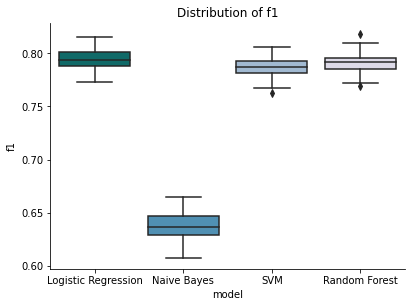

In [13]:
import seaborn as sns

f1 = sns.catplot(data=model_data, x="model", y="f1", kind="box", palette='PuBuGn_r')
f1.set(xticklabels=["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"])
f1.set(title='Distribution of f1')
f1.fig.set_size_inches(6,4)

In [14]:
f1.savefig('f1.png')

# Learning Curves

### Best Logistic Regression

In [ ]:
# # Define a pipeline with pre-processing and a Logistic Regression
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import joblib

# best_logistic_regression = joblib.load('./models/best-logistic-regression-model.joblib')
# print(best_logistic_regression)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


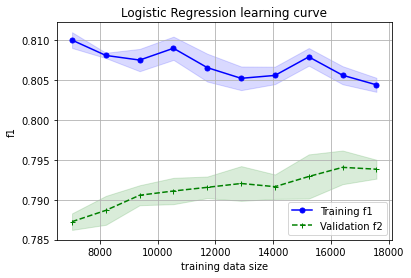

In [15]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import joblib

best_logistic_regression = joblib.load('./models/best-logistic-regression-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_logistic_regression, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Logistic Regression learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('lg-lc.png')
plt.show()

# the model 

### Naive Bayse

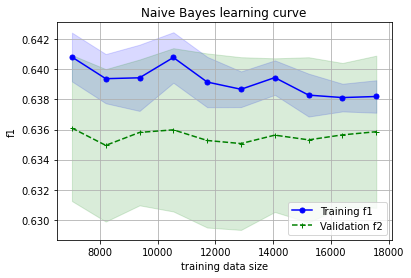

In [16]:
best_nb = joblib.load('./models/best-nb-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_nb, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Naive Bayes learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('nb-lc.png')
plt.show()

# the model 

### Support Vector Machine

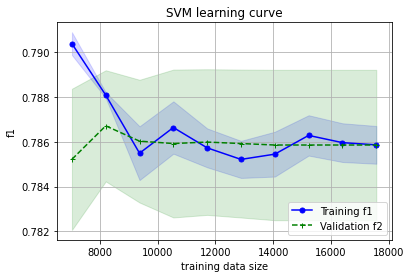

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import joblib

best_svm = joblib.load('./models/best-svm-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_svm, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1"
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('SVM learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('svm-lc.png')
plt.show()

# the model 

### Random Forest

In [ ]:
best_rf = joblib.load('./models/best-rf-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_rf, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

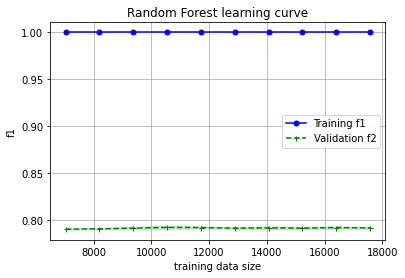

In [12]:
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Random Forest learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='center right')
plt.savefig('rf-lc.png')
plt.show()

# the model 